In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.interpolate


def signal_interpolate(
    x_values=None, y_values=None, x_new=None, method="quadratic", fill_value=None
):
    """**Interpolate a signal**
    Interpolate a signal using different methods.
    Parameters
    ----------
    x_values : Union[list, np.array, pd.Series]
        The samples corresponding to the values to be interpolated.
    y_values : Union[list, np.array, pd.Series]
        The values to be interpolated.
    x_new : Union[list, np.array, pd.Series] or int
        The samples at which to interpolate the y_values. Samples before the first value in x_values
        or after the last value in x_values will be extrapolated. If an integer is passed, nex_x
        will be considered as the desired length of the interpolated signal between the first and
        the last values of x_values. No extrapolation will be done for values before or after the
        first and the last values of x_values.
    method : str
        Method of interpolation. Can be ``"linear"``, ``"nearest"``, ``"zero"``, ``"slinear"``,
        ``"quadratic"``, ``"cubic"``, ``"previous"``, ``"next"`` or ``"monotone_cubic"``. The
        methods ``"zero"``, ``"slinear"``,``"quadratic"`` and ``"cubic"`` refer to a spline
        interpolation of zeroth, first, second or third order; whereas ``"previous"`` and
        ``"next"`` simply return the previous or next value of the point. An integer specifying the
        order of the spline interpolator to use.
        See `here <https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.
        PchipInterpolator.html>`_ for details on the ``"monotone_cubic"`` method.
    fill_value : float or tuple or str
        If a ndarray (or float), this value will be used to fill in for
        requested points outside of the data range.
        If a two-element tuple, then the first element is used as a fill value
        for x_new < x[0] and the second element is used for x_new > x[-1].
        If "extrapolate", then points outside the data range will be extrapolated.
        If not provided, then the default is ([y_values[0]], [y_values[-1]]).
    Returns
    -------
    array
        Vector of interpolated samples.
    Examples
    --------
    .. ipython:: python
      import numpy as np
      import neurokit2 as nk
      import matplotlib.pyplot as plt
      # Generate Simulated Signal
      signal = nk.signal_simulate(duration=2, sampling_rate=10)
      # We want to interpolate to 2000 samples
      x_values = np.linspace(0, 2000, num=len(signal), endpoint=False)
      x_new = np.linspace(0, 2000, num=2000, endpoint=False)
      # Visualize all interpolation methods
      @savefig p_signal_interpolate1.png scale=100%
      nk.signal_plot([
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="zero"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="linear"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="quadratic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="cubic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="previous"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="next"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="monotone_cubic")
      ], labels = ["Zero", "Linear", "Quadratic", "Cubic", "Previous", "Next", "Monotone Cubic"])
      # Add original data points
      plt.scatter(x_values, signal, label="original datapoints", zorder=3)
      @suppress
      plt.close()
    """
    # Sanity checks
    if x_values is None and y_values is None:
        raise ValueError(
            "NeuroKit error: signal_interpolate(): x_values or y_values must be provided."
        )
    elif x_values is None or y_values is None:
        # for interpolating NaNs
        if y_values is None:
            y_values = x_values
        x_values = np.arange(0, len(y_values))
        if x_new is None:
            x_new = x_values
        y_finite = np.where(np.invert(np.isnan(y_values)))[0]
        x_values = x_values[y_finite]
        y_values = y_values[y_finite]
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must be of the same length.")

    if isinstance(x_new, int):
        if len(x_values) == x_new:
            return y_values
    else:
        if len(x_values) == len(x_new):
            return y_values
    if method == "monotone_cubic":
        interpolation_function = scipy.interpolate.PchipInterpolator(
            x_values, y_values, extrapolate=True
        )
    else:
        if fill_value is None:
            fill_value = ([y_values[0]], [y_values[-1]])
        interpolation_function = scipy.interpolate.interp1d(
            x_values,
            y_values,
            kind=method,
            bounds_error=False,
            fill_value=fill_value,
        )
    if isinstance(x_new, int):
        x_new = np.linspace(x_values[0], x_values[-1], x_new)
    interpolated = interpolation_function(x_new)

    if method == "monotone_cubic" and fill_value != "extrapolate":
        
        first_index = np.argmin(np.abs(x_new - x_values[0]))
        second_index = np.argmin(np.abs(x_new - x_values[-1]))
        
        if fill_value is None:
            # Swap out the cubic extrapolation of out-of-bounds segments generated by
            # scipy.interpolate.PchipInterpolator for constant extrapolation akin to the behavior of
            # scipy.interpolate.interp1d with fill_value=([y_values[0]], [y_values[-1]].
            interpolated[: int(x_values[0])] = interpolated[int(x_values[0])]
            interpolated[int(x_values[-1]) :] = interpolated[int(x_values[-1])]
        else:
            interpolated[: int(x_values[0])] = fill_value[int(x_new)]
            
    return interpolated


In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.interpolate


def signal_interpolate(
    x_values=None, y_values=None, x_new=None, method="quadratic", fill_value=None
):
    """**Interpolate a signal**
    Interpolate a signal using different methods.
    Parameters
    ----------
    x_values : Union[list, np.array, pd.Series]
        The samples corresponding to the values to be interpolated.
    y_values : Union[list, np.array, pd.Series]
        The values to be interpolated.
    x_new : Union[list, np.array, pd.Series] or int
        The samples at which to interpolate the y_values. Samples before the first value in x_values
        or after the last value in x_values will be extrapolated. If an integer is passed, nex_x
        will be considered as the desired length of the interpolated signal between the first and
        the last values of x_values. No extrapolation will be done for values before or after the
        first and the last values of x_values.
    method : str
        Method of interpolation. Can be ``"linear"``, ``"nearest"``, ``"zero"``, ``"slinear"``,
        ``"quadratic"``, ``"cubic"``, ``"previous"``, ``"next"`` or ``"monotone_cubic"``. The
        methods ``"zero"``, ``"slinear"``,``"quadratic"`` and ``"cubic"`` refer to a spline
        interpolation of zeroth, first, second or third order; whereas ``"previous"`` and
        ``"next"`` simply return the previous or next value of the point. An integer specifying the
        order of the spline interpolator to use.
        See `here <https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.
        PchipInterpolator.html>`_ for details on the ``"monotone_cubic"`` method.
    fill_value : float or tuple or str
        If a ndarray (or float), this value will be used to fill in for
        requested points outside of the data range.
        If a two-element tuple, then the first element is used as a fill value
        for x_new < x[0] and the second element is used for x_new > x[-1].
        If "extrapolate", then points outside the data range will be extrapolated.
        If not provided, then the default is ([y_values[0]], [y_values[-1]]).
    Returns
    -------
    array
        Vector of interpolated samples.
    Examples
    --------
    .. ipython:: python
      import numpy as np
      import neurokit2 as nk
      import matplotlib.pyplot as plt
      # Generate Simulated Signal
      signal = nk.signal_simulate(duration=2, sampling_rate=10)
      # We want to interpolate to 2000 samples
      x_values = np.linspace(0, 2000, num=len(signal), endpoint=False)
      x_new = np.linspace(0, 2000, num=2000, endpoint=False)
      # Visualize all interpolation methods
      @savefig p_signal_interpolate1.png scale=100%
      nk.signal_plot([
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="zero"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="linear"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="quadratic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="cubic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="previous"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="next"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="monotone_cubic")
      ], labels = ["Zero", "Linear", "Quadratic", "Cubic", "Previous", "Next", "Monotone Cubic"])
      # Add original data points
      plt.scatter(x_values, signal, label="original datapoints", zorder=3)
      @suppress
      plt.close()
    """
    # Sanity checks
    if x_values is None and y_values is None:
        raise ValueError(
            "NeuroKit error: signal_interpolate(): x_values or y_values must be provided."
        )
    elif x_values is None or y_values is None:
        # for interpolating NaNs
        if y_values is None:
            y_values = x_values
        x_values = np.arange(0, len(y_values))
        if x_new is None:
            x_new = x_values
        y_finite = np.where(np.invert(np.isnan(y_values)))[0]
        x_values = x_values[y_finite]
        y_values = y_values[y_finite]
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must be of the same length.")

    if isinstance(x_new, int):
        if len(x_values) == x_new:
            return y_values
    else:
        if len(x_values) == len(x_new):
            return y_values
    if method == "monotone_cubic":
        interpolation_function = scipy.interpolate.PchipInterpolator(
            x_values, y_values, extrapolate=True
        )
    else:
        if fill_value is None:
            fill_value = ([y_values[0]], [y_values[-1]])
        interpolation_function = scipy.interpolate.interp1d(
            x_values,
            y_values,
            kind=method,
            bounds_error=False,
            fill_value=fill_value,
        )
    if isinstance(x_new, int):
        x_new = np.linspace(x_values[0], x_values[-1], x_new)
    interpolated = interpolation_function(x_new)

    if method == "monotone_cubic" and fill_value != "extrapolate":
        # Swap out the cubic extrapolation of out-of-bounds segments generated by
        # scipy.interpolate.PchipInterpolator for constant extrapolation akin to the behavior of
        # scipy.interpolate.interp1d with fill_value=([y_values[0]], [y_values[-1]].
        interpolated[: int(x_values[0])] = interpolated[int(x_values[0])]
        interpolated[int(x_values[-1]) :] = interpolated[int(x_values[-1])]
    return interpolated


In [4]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.interpolate


def signal_interpolate(
    x_values=None, y_values=None, x_new=None, method="quadratic", fill_value=None
):
    """**Interpolate a signal**
    Interpolate a signal using different methods.
    Parameters
    ----------
    x_values : Union[list, np.array, pd.Series]
        The samples corresponding to the values to be interpolated.
    y_values : Union[list, np.array, pd.Series]
        The values to be interpolated.
    x_new : Union[list, np.array, pd.Series] or int
        The samples at which to interpolate the y_values. Samples before the first value in x_values
        or after the last value in x_values will be extrapolated. If an integer is passed, nex_x
        will be considered as the desired length of the interpolated signal between the first and
        the last values of x_values. No extrapolation will be done for values before or after the
        first and the last values of x_values.
    method : str
        Method of interpolation. Can be ``"linear"``, ``"nearest"``, ``"zero"``, ``"slinear"``,
        ``"quadratic"``, ``"cubic"``, ``"previous"``, ``"next"`` or ``"monotone_cubic"``. The
        methods ``"zero"``, ``"slinear"``,``"quadratic"`` and ``"cubic"`` refer to a spline
        interpolation of zeroth, first, second or third order; whereas ``"previous"`` and
        ``"next"`` simply return the previous or next value of the point. An integer specifying the
        order of the spline interpolator to use.
        See `here <https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.
        PchipInterpolator.html>`_ for details on the ``"monotone_cubic"`` method.
    fill_value : float or tuple or str
        If a ndarray (or float), this value will be used to fill in for
        requested points outside of the data range.
        If a two-element tuple, then the first element is used as a fill value
        for x_new < x[0] and the second element is used for x_new > x[-1].
        If "extrapolate", then points outside the data range will be extrapolated.
        If not provided, then the default is ([y_values[0]], [y_values[-1]]).
    Returns
    -------
    array
        Vector of interpolated samples.
    Examples
    --------
    .. ipython:: python
      import numpy as np
      import neurokit2 as nk
      import matplotlib.pyplot as plt
      # Generate Simulated Signal
      signal = nk.signal_simulate(duration=2, sampling_rate=10)
      # We want to interpolate to 2000 samples
      x_values = np.linspace(0, 2000, num=len(signal), endpoint=False)
      x_new = np.linspace(0, 2000, num=2000, endpoint=False)
      # Visualize all interpolation methods
      @savefig p_signal_interpolate1.png scale=100%
      nk.signal_plot([
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="zero"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="linear"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="quadratic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="cubic"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="previous"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="next"),
          nk.signal_interpolate(x_values, signal, x_new=x_new, method="monotone_cubic")
      ], labels = ["Zero", "Linear", "Quadratic", "Cubic", "Previous", "Next", "Monotone Cubic"])
      # Add original data points
      plt.scatter(x_values, signal, label="original datapoints", zorder=3)
      @suppress
      plt.close()
    """
    # Sanity checks
    if x_values is None and y_values is None:
        raise ValueError(
            "NeuroKit error: signal_interpolate(): x_values or y_values must be provided."
        )
    elif x_values is None or y_values is None:
        # for interpolating NaNs
        if y_values is None:
            y_values = x_values
        x_values = np.arange(0, len(y_values))
        if x_new is None:
            x_new = x_values
        y_finite = np.where(np.invert(np.isnan(y_values)))[0]
        x_values = x_values[y_finite]
        y_values = y_values[y_finite]
    if len(x_values) != len(y_values):
        raise ValueError("x_values and y_values must be of the same length.")

    if isinstance(x_new, int):
        if len(x_values) == x_new:
            return y_values
    else:
        if len(x_values) == len(x_new):
            return y_values
    if method == "monotone_cubic":
        interpolation_function = scipy.interpolate.PchipInterpolator(
            x_values, y_values, extrapolate=True
        )
    else:
        if fill_value is None:
            fill_value = ([y_values[0]], [y_values[-1]])
        interpolation_function = scipy.interpolate.interp1d(
            x_values,
            y_values,
            kind=method,
            bounds_error=False,
            fill_value=fill_value,
        )
    if isinstance(x_new, int):
        x_new = np.linspace(x_values[0], x_values[-1], x_new)
    interpolated = interpolation_function(x_new)

    if method == "monotone_cubic" and fill_value != "extrapolate":
        # Find the index of the new x value that is closest to the first original x value
        first_index = np.argmin(np.abs(x_new - x_values[0]))
        # Find the index of the new x value that is closest to the last original x value
        last_index = np.argmin(np.abs(x_new - x_values[-1]))
        
        if fill_value is None:
            # Swap out the cubic extrapolation of out-of-bounds segments generated by
            # scipy.interpolate.PchipInterpolator for constant extrapolation akin to the behavior of
            # scipy.interpolate.interp1d with fill_value=([y_values[0]], [y_values[-1]].
            fill_value = ([interpolated[first_index]], [interpolated[last_index]])
        elif isinstance(fill_value, float) or isinstance(fill_value, int):
            # if only a single integer or float is provided as a fill value, format as a tuple
            fill_value = ([fill_value], [fill_value])

        interpolated[: first_index] = fill_value[0]
        interpolated[last_index + 1:] = fill_value[1]
            
    return interpolated

In [122]:
x_values = np.arange(20)/3

In [123]:
y_values = np.sin(x_values)

In [124]:
import matplotlib.pyplot as plt


In [125]:
x_new = np.arange(30)/4

In [126]:
x_values

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
       3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
       5.        , 5.33333333, 5.66666667, 6.        , 6.33333333])

In [127]:
x_new

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25])

In [128]:
x_new[3]

0.75

In [129]:
x_new[3:]

array([0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25,
       3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  ,
       6.25, 6.5 , 6.75, 7.  , 7.25])

In [130]:
x_new[:3]

array([0.  , 0.25, 0.5 ])

(-1.0, 1.0)

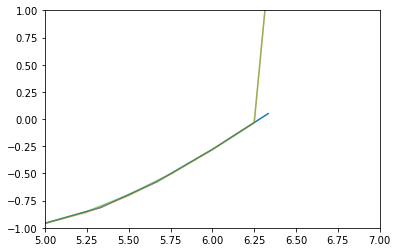

In [131]:
plt.plot(x_values, y_values)
y_new = signal_interpolate(x_values=x_values, y_values=y_values, x_new=x_new, method="monotone_cubic", fill_value=4)
plt.plot(x_new, y_new, alpha=0.5)
y_new = signal_interpolate(x_values=x_values, y_values=y_values, x_new=x_new, method="linear", fill_value=4)
plt.plot(x_new, y_new, alpha=0.5)
plt.xlim([5,7])
plt.ylim([-1,1])

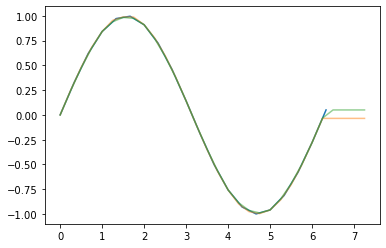

In [132]:
plt.plot(x_values, y_values)
y_new = signal_interpolate(x_values=x_values, y_values=y_values, x_new=x_new, method="monotone_cubic")
plt.plot(x_new, y_new, alpha=0.5)
y_new = signal_interpolate(x_values=x_values, y_values=y_values, x_new=x_new, method="linear")
plt.plot(x_new, y_new, alpha=0.5)


In [77]:
sampling_rate=200
peaks = np.arange(stop=1000, step=sampling_rate)
interpolation_rate=10
peaks[1:] # Skip first peak since it has no corresponding element in heart_period

array([200, 400, 600, 800])

In [78]:
peaks

array([  0, 200, 400, 600, 800])

In [79]:
desired_length = int(np.rint(peaks[-1]))
x_new = np.arange(1, desired_length, 1 / interpolation_rate)
x_new

array([  1. ,   1.1,   1.2, ..., 799.7, 799.8, 799.9])

In [80]:
x_new = np.arange(start=peaks[1], stop=peaks[-1] + 1 / interpolation_rate, step=1 / interpolation_rate)
x_new

array([200. , 200.1, 200.2, ..., 799.8, 799.9, 800. ])

In [81]:
x_new

array([200. , 200.1, 200.2, ..., 799.8, 799.9, 800. ])

In [43]:
rri = np.diff(peaks) / sampling_rate * 1000


In [44]:
x_new=np.arange(desired_length)

In [45]:
x_new

array([   0,    1,    2, ..., 1797, 1798, 1799])

In [46]:
len(rri)

8

In [47]:
interpolation_rate = 4

In [48]:
if interpolate is False:
    sampling_rate = None

else:

    # Sanitize minimum sampling rate for interpolation to 10 Hz
    sampling_rate = max(sampling_rate, 10)

    # Compute length of interpolated heart period signal at requested sampling rate.
    desired_length = int(np.rint(peaks[-1]))

    rri = signal_interpolate(
        peaks[1:],  # Skip first peak since it has no corresponding element in heart_period
        rri,
        x_new=np.arange(desired_length),
    )

1800

array([ 200.  ,  200.25,  200.5 , ..., 1799.5 , 1799.75, 1800.  ])

In [51]:
np.arange(1, desired_length, 1/interpolation_rate)

array([1.00000e+00, 1.25000e+00, 1.50000e+00, ..., 1.79925e+03,
       1.79950e+03, 1.79975e+03])

In [29]:
if interpolate is False:
    sampling_rate = None

else:

    # Sanitize minimum sampling rate for interpolation to 10 Hz
    sampling_rate = max(sampling_rate, 10)

    # Compute length of interpolated heart period signal at requested sampling rate.
    desired_length = int(np.rint(peaks[-1]))

    rri = signal_interpolate(
        peaks[1:],  # Skip first peak since it has no corresponding element in heart_period
        rri,
        x_new=np.arange(desired_length),
    )

In [85]:
new_peak_time = [0.234, 0.584, 0.934]
fixed_peak_time = [0.23, 0.584, 0.7, 0.934]

In [87]:
np.round(fixed_peak_time, 1)

array([0.2, 0.6, 0.7, 0.9])

In [84]:
1/100

0.01

In [92]:
dec = 1
fixed_peak_time = samp_to_timestamp(fixed_new_peaks, sig_time=sig_time)
added_peak_time = np.array([peak for peak in fixed_peak_time if np.round(peak, 1) not in np.round(new_peak_time, dec)])
kept_peak_time = np.array([peak for peak in fixed_peak_time if np.round(peak, 1) in np.round(new_peak_time, dec)])
height_fixed_added_peak_time = fixpeaks_by_height(added_peak_time,
                                 sig_info={"time": corr_times, "sig": corrs, "sampling_rate": sampling_rate})
final_peak_time = np.sort(np.concatenate(kept_peak_time, height_fixed_added_peak_time))

In [93]:
added_peak_time

[0.7]

In [94]:
kept_peak_time

[0.23, 0.584, 0.934]

NameError: name 'fixpeaks_by_height' is not defined